# Song Visualization Notebook (Seaborn Version)
This notebook includes code for:
1. PCA (structural explanation)
2. t-SNE & UMAP (main visualization)
3. Valence vs Energy (sanity-check plot)

**NOTE:** Cells are *not executed* so you can run them locally.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import umap
import itertools

In [2]:
df = pd.read_pickle("./data/merged_data.pkl")

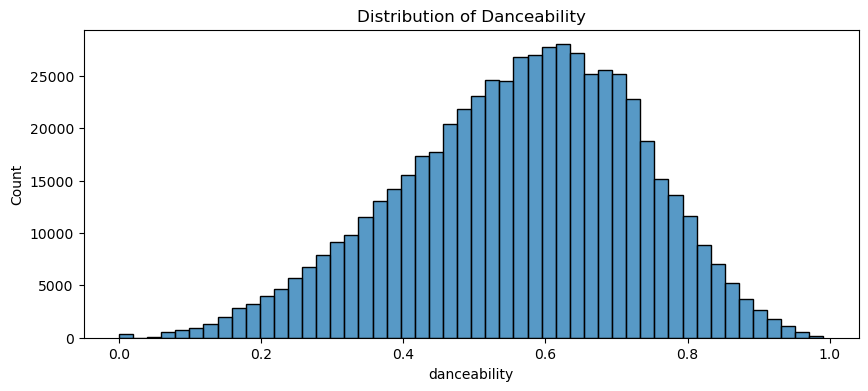

In [3]:
plt.figure(figsize=(10,4))
sns.histplot(df['danceability'], bins=50)
plt.title("Distribution of Danceability")
plt.show()

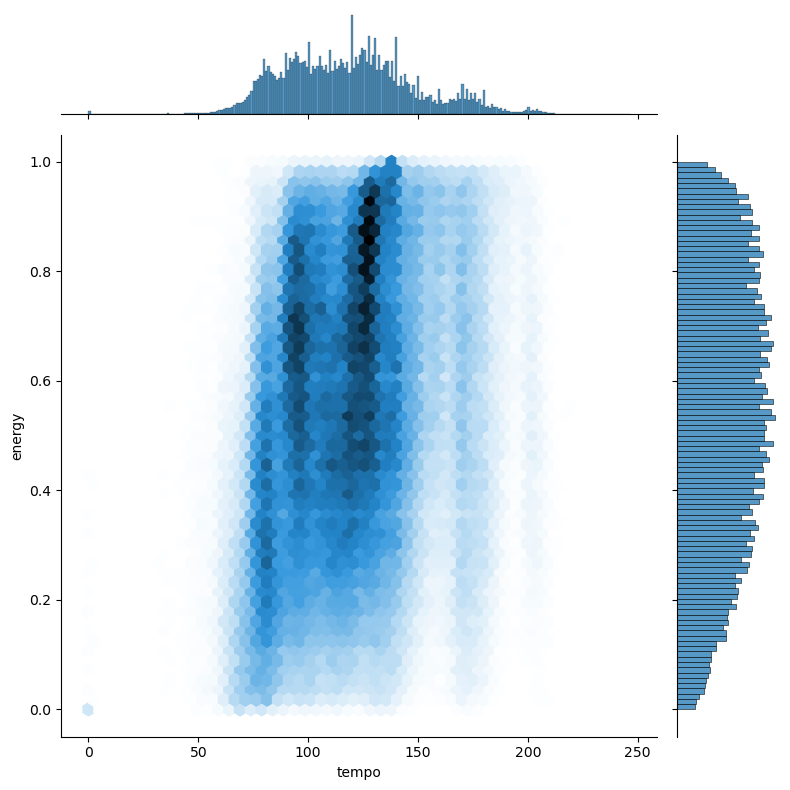

In [4]:
sns.jointplot(
    data=df,
    x="tempo", 
    y="energy", 
    kind="hex", 
    height=8
)

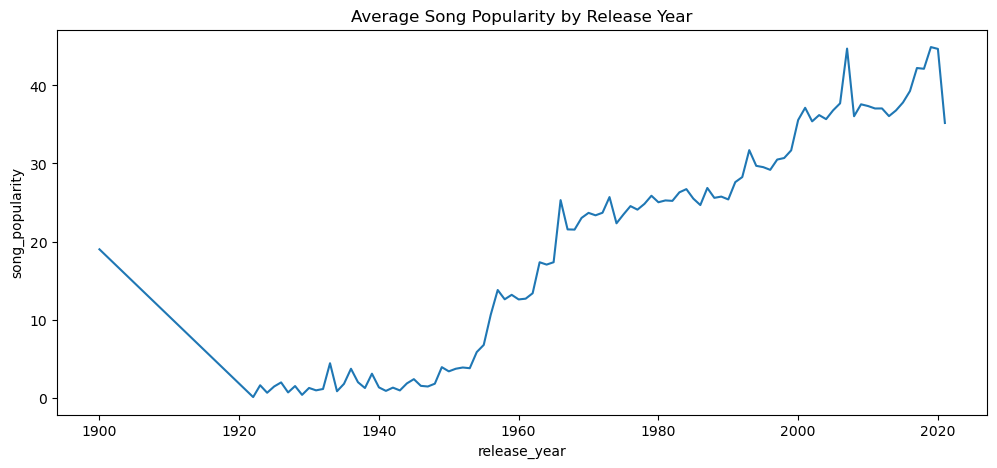

In [5]:
yearly = df.groupby('release_year')['song_popularity'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=yearly, x='release_year', y='song_popularity')
plt.title("Average Song Popularity by Release Year")
plt.show()

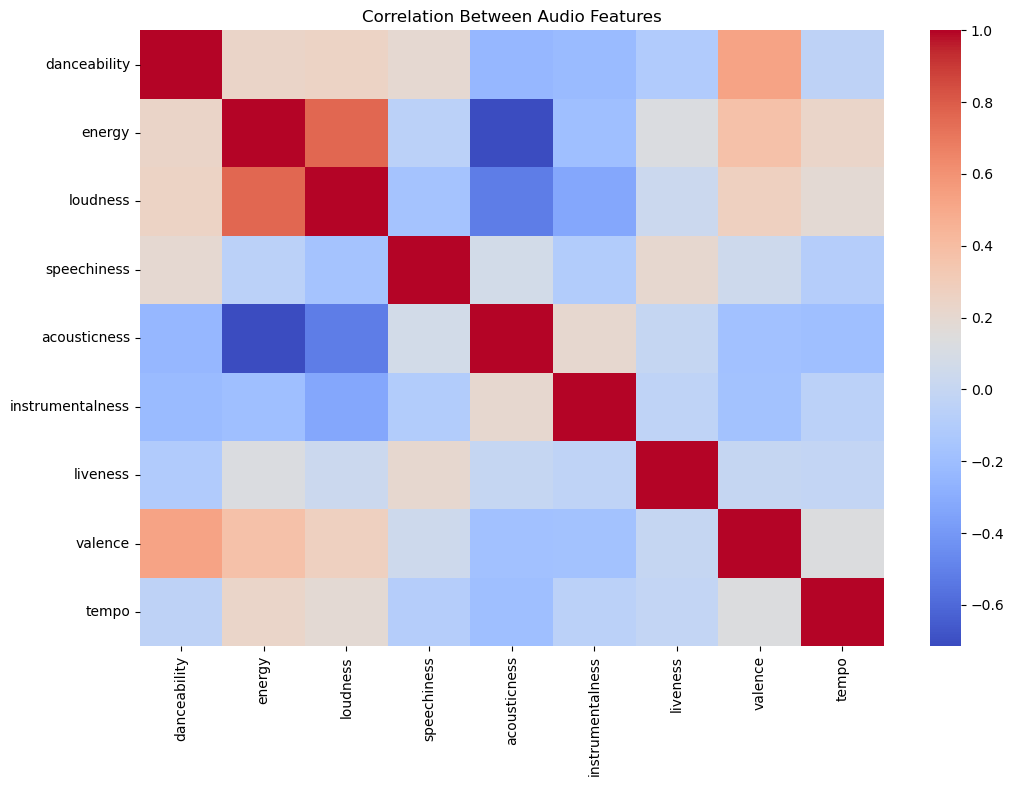

In [6]:
audio_features = [
    "danceability","energy","loudness","speechiness",
    "acousticness","instrumentalness","liveness",
    "valence","tempo"
]

plt.figure(figsize=(12,8))
sns.heatmap(df[audio_features].corr(), cmap="coolwarm")
plt.title("Correlation Between Audio Features")
plt.show()


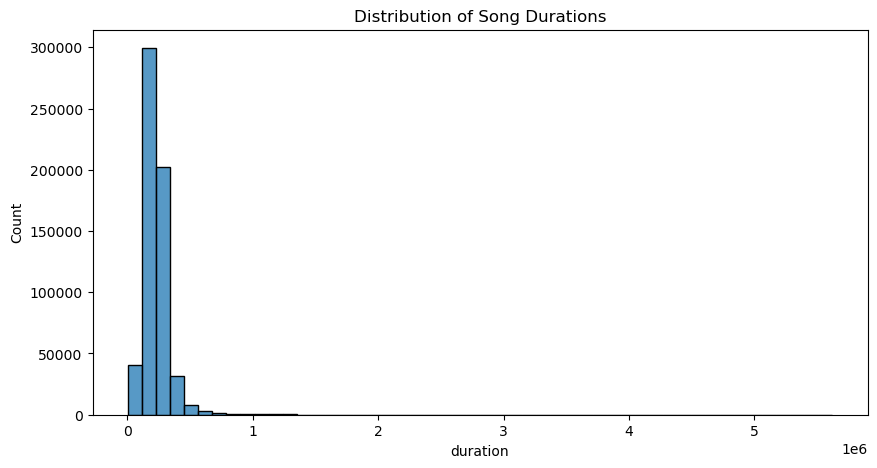

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df['duration'], bins=50)
plt.title("Distribution of Song Durations")
plt.show()

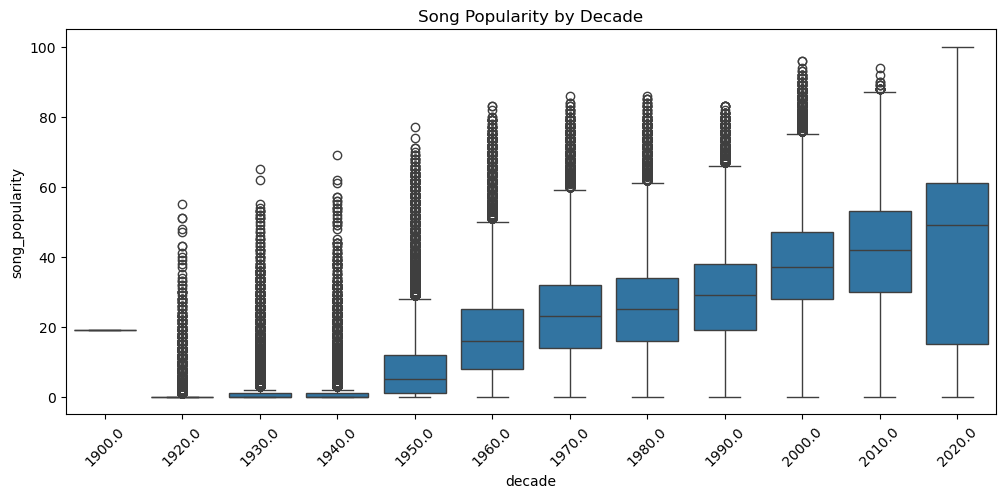

In [8]:
df['decade'] = (df['release_year'] // 10) * 10

plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="decade", y="song_popularity")
plt.title("Song Popularity by Decade")
plt.xticks(rotation=45)
plt.show()

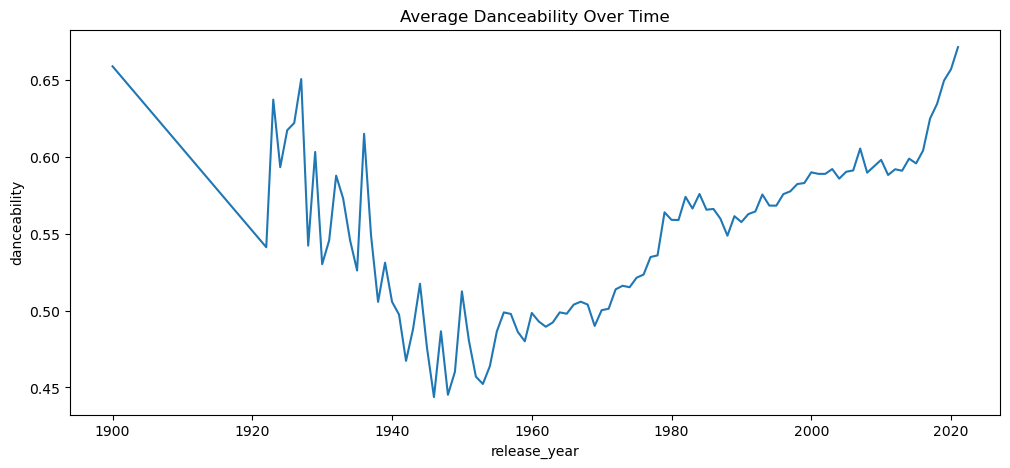

In [9]:
yearly_dance = df.groupby("release_year")["danceability"].mean().reset_index()

#saab y ära vahetada energy / loudness / tempo / valence vastu

plt.figure(figsize=(12,5))
sns.lineplot(data=yearly_dance, x="release_year", y="danceability")
plt.title("Average Danceability Over Time")
plt.show()

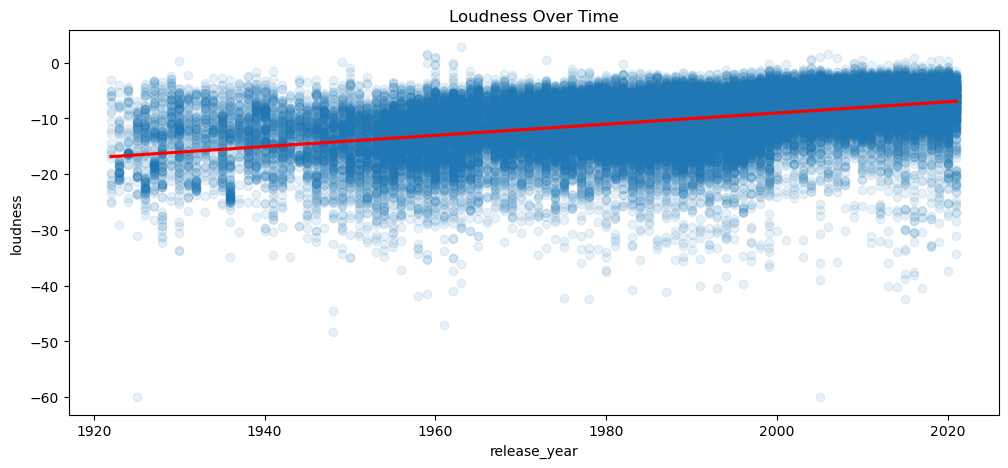

In [10]:
plt.figure(figsize=(12,5))
sns.regplot(
    data=df.sample(50000),
    x="release_year",
    y="loudness",
    scatter_kws={"alpha":0.1},
    line_kws={"color":"red"}
)
plt.title("Loudness Over Time")
plt.show()


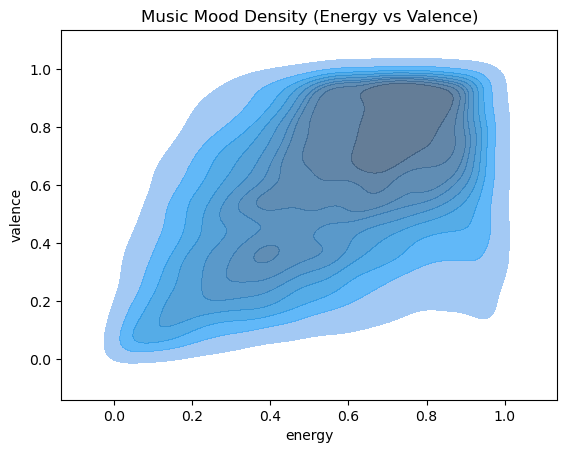

In [11]:
sns.kdeplot(
    data=df.sample(30000),
    x="energy",
    y="valence",
    fill=True,
    thresh=0.05,
    alpha=0.8
)
plt.title("Music Mood Density (Energy vs Valence)")
plt.show()


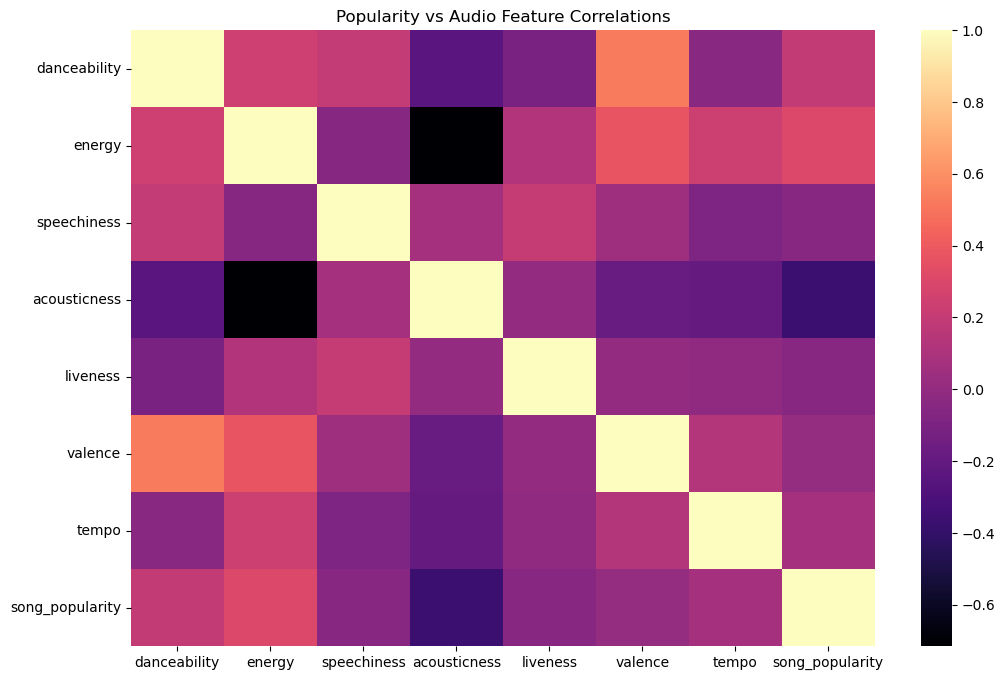

In [12]:
features = [
    "danceability","energy","speechiness","acousticness",
    "liveness","valence","tempo","song_popularity"
]

plt.figure(figsize=(12,8))
sns.heatmap(df[features].corr(), annot=False, cmap="magma")
plt.title("Popularity vs Audio Feature Correlations")
plt.show()


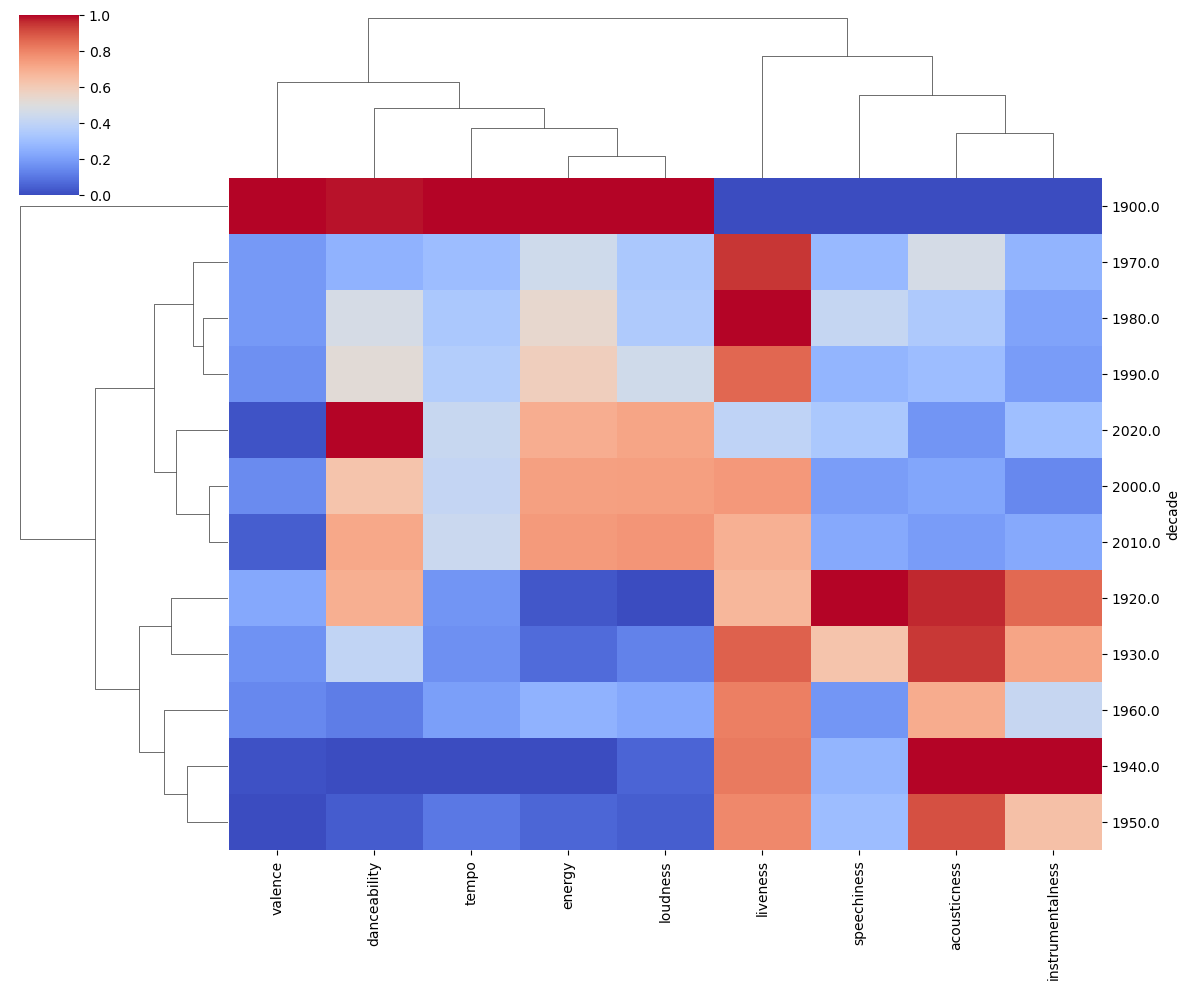

In [13]:
df['decade'] = (df['release_year'] // 10) * 10

numeric_features = [
    "danceability","energy","loudness","speechiness",
    "acousticness","instrumentalness","liveness","valence","tempo"
]

pivot = df.groupby("decade")[numeric_features].mean()

sns.clustermap(
    pivot,
    cmap="coolwarm",
    standard_scale=1,
    figsize=(12,10)
)


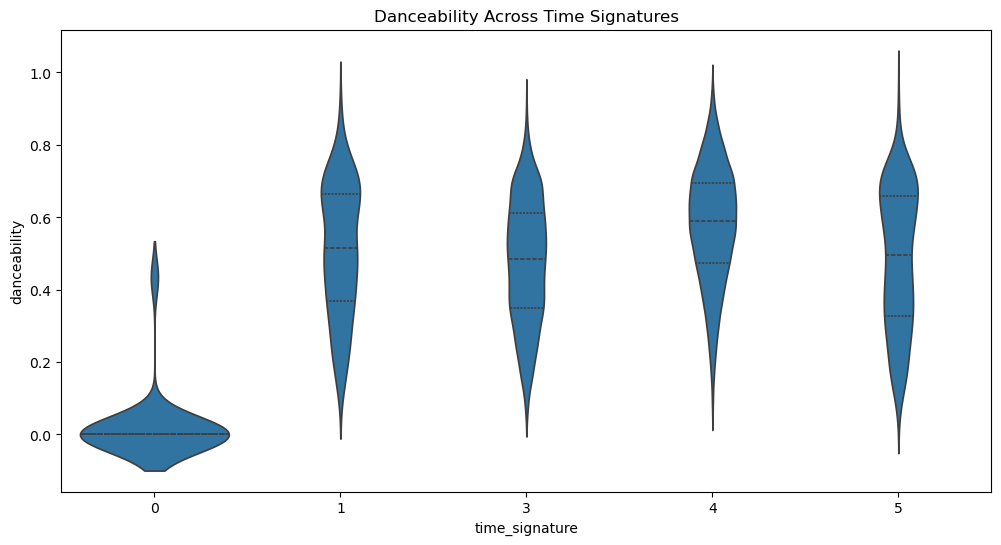

In [14]:
plt.figure(figsize=(12,6))
sns.violinplot(
    data=df.sample(30000),
    x="time_signature",
    y="danceability",
    inner="quartile"
)
plt.title("Danceability Across Time Signatures")
plt.show()


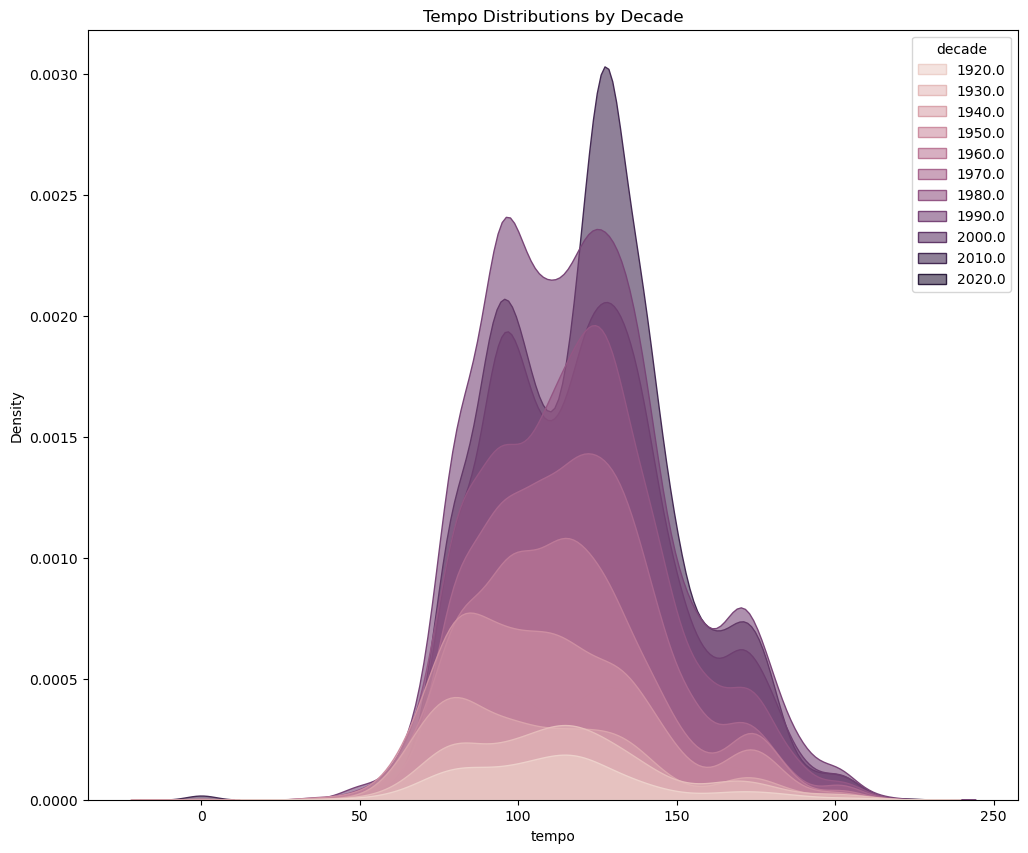

In [15]:
import seaborn as sns

df['decade'] = (df['release_year'] // 10) * 10

plt.figure(figsize=(12,10))
sns.kdeplot(
    data=df.sample(50000),
    x="tempo",
    hue="decade",
    fill=True,
    alpha=0.6
)
plt.title("Tempo Distributions by Decade")
plt.show()


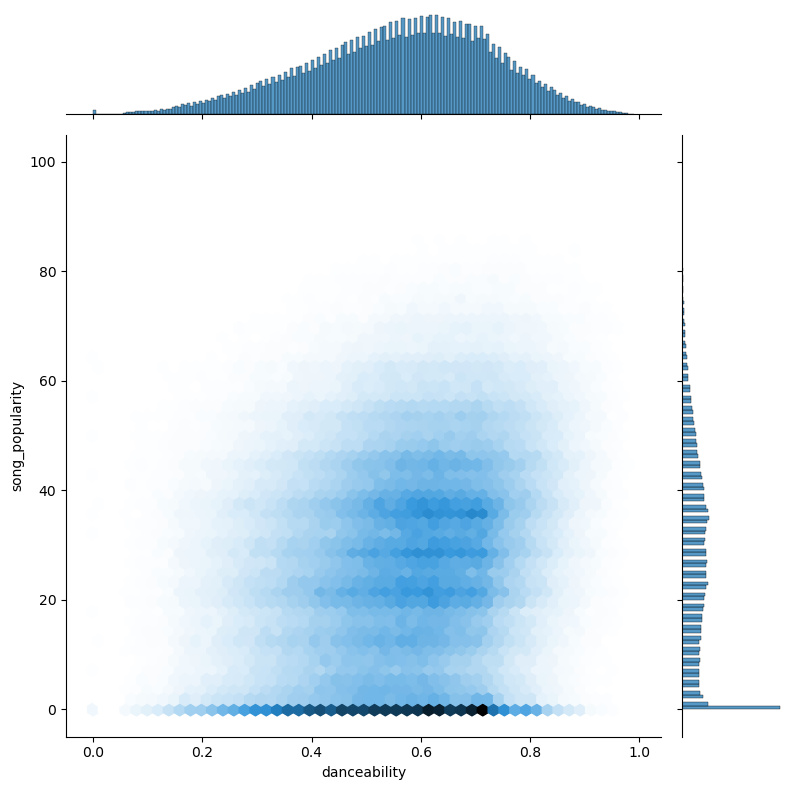

In [16]:
sns.jointplot(
    data=df,
    x="danceability",
    y="song_popularity",
    kind="hex",
    height=8
)


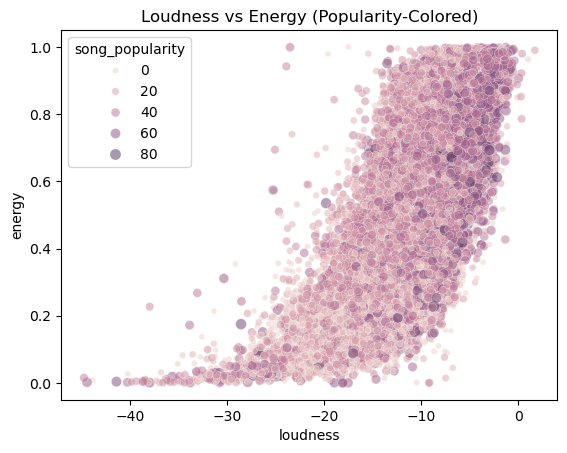

In [17]:
sns.scatterplot(
    data=df.sample(30000),
    x="loudness",
    y="energy",
    hue="song_popularity",
    size="song_popularity",
    alpha=0.5
)
plt.title("Loudness vs Energy (Popularity-Colored)")
plt.show()


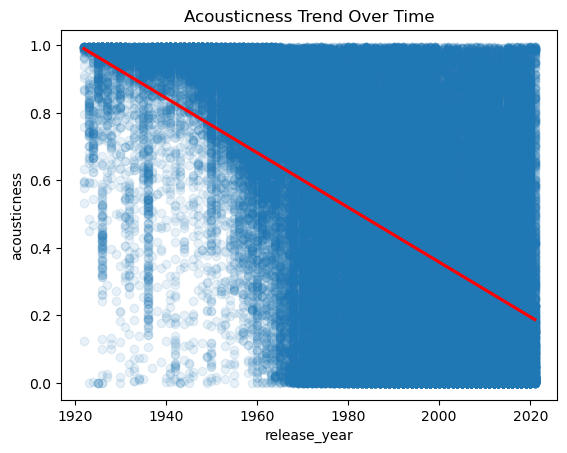

In [18]:
sns.regplot(
    data=df.sample(100000),
    x="release_year",
    y="acousticness",
    scatter_kws={"alpha":0.1},
    line_kws={"color":"red"}
)
plt.title("Acousticness Trend Over Time")
plt.show()


C:\Users\kristja3\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


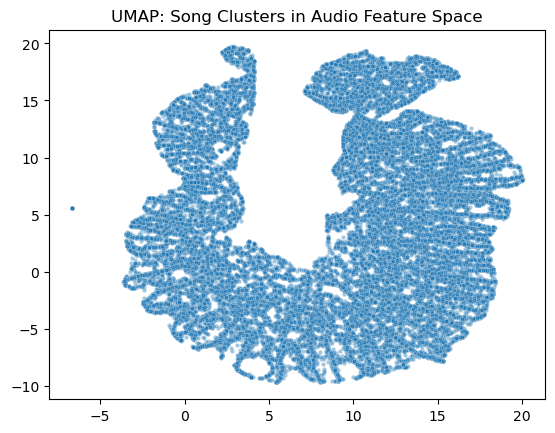

In [19]:
features = df[[
    "danceability","energy","loudness","speechiness",
    "acousticness","instrumentalness","liveness",
    "valence","tempo"
]].sample(50000, random_state=1)

reducer = umap.UMAP(random_state=1)
embedding = reducer.fit_transform(features)

sns.scatterplot(
    x=embedding[:,0], 
    y=embedding[:,1],
    alpha=0.4,
    s=10
)
plt.title("UMAP: Song Clusters in Audio Feature Space")
plt.show()


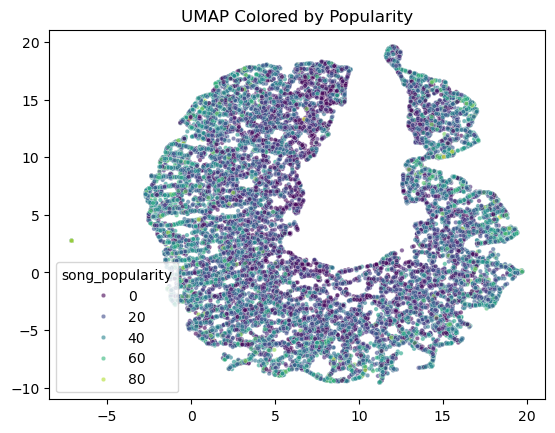

In [20]:
sample = df.sample(30000)

features = sample[[
    "danceability","energy","loudness","speechiness",
    "acousticness","instrumentalness","liveness",
    "valence","tempo"
]]

embedding = umap.UMAP().fit_transform(features)

sns.scatterplot(
    x=embedding[:,0],
    y=embedding[:,1],
    hue=sample["song_popularity"],
    palette="viridis",
    alpha=0.6,
    s=10
)
plt.title("UMAP Colored by Popularity")
plt.show()


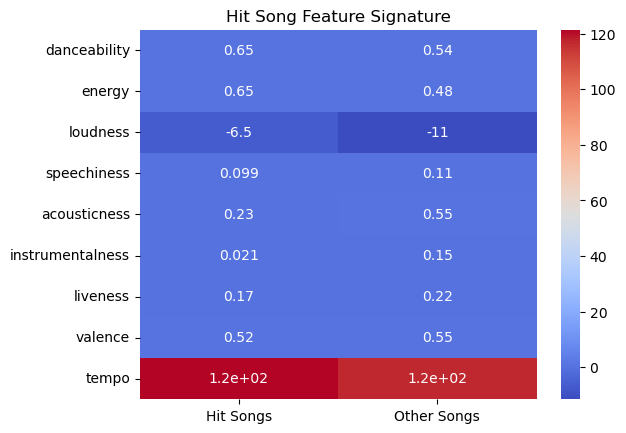

In [21]:
numeric = [
    "danceability","energy","loudness","speechiness",
    "acousticness","instrumentalness","liveness",
    "valence","tempo"
]

hit = df[df["song_popularity"] > 70]
nonhit = df[df["song_popularity"] < 30]

hit_mean = hit[numeric].mean()
nonhit_mean = nonhit[numeric].mean()

comparison = pd.DataFrame({
    "Hit Songs": hit_mean,
    "Other Songs": nonhit_mean
})

sns.heatmap(comparison, annot=True, cmap="coolwarm")
plt.title("Hit Song Feature Signature")
plt.show()


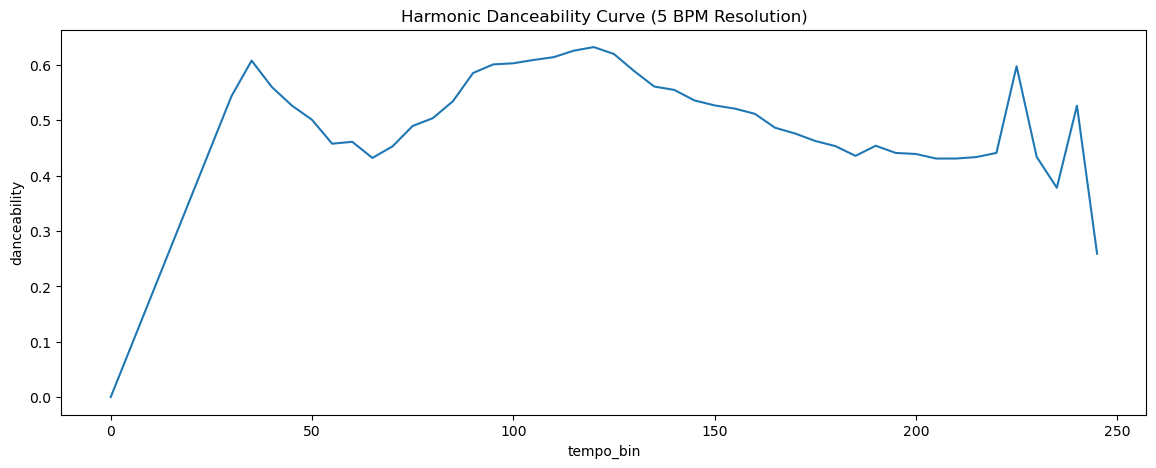

In [22]:
df["tempo_bin"] = (df["tempo"] // 5) * 5

heat = df.groupby("tempo_bin")["danceability"].mean().reset_index()

plt.figure(figsize=(14,5))
sns.lineplot(data=heat, x="tempo_bin", y="danceability")
plt.title("Harmonic Danceability Curve (5 BPM Resolution)")
plt.show()
